In [1]:
from text_classifier import TextClassifier
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
tc = TextClassifier(['texto dice algo', 'texto dice otra cosa'], ['id1', 'id2'])

In [3]:
tc.store_text(['nuevo texto', 'algo dice el nuevo'], ['id3','id4'], replace_texts=True)

In [4]:
tc.make_classifier("test",['id1','id2','id3','id4'],['a', 'a', 'b','b'])

In [5]:
indices = np.in1d(tc.ids, ['id1','id2','id4'])
indices
tc.tfidf_mat[indices,:]

<3x5 sparse matrix of type '<type 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [8]:
tc.classify("test", examples=["id1", "id2", "id3", 'id4'])

(array(['a', 'b'], 
       dtype='|S1'),
 array([ 5.87072026, -4.9247235 ,  4.99976881,  3.8789758 ]))

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
textvec_palabras = CountVectorizer(input='content', ngram_range=(1,1),  min_df=1)

tfidf_mat = textvec_palabras.fit_transform(['texto dice algo', 'texto dice otra cosa'])

In [26]:
tfidf_mat = TfidfTransformer().fit_transform(tfidf_mat)

In [4]:
np.argsort()

<4x5 sparse matrix of type '<type 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [15]:
textvec_palabras.fit(["mi perro es bueno"])

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [18]:
textvec_palabras.vocabulary = ['perro', 'algo']

In [21]:
textvec_palabras.transform(['texto dice algo', 'texto dice otra cosa'])

<2x2 sparse matrix of type '<type 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [20]:
textvec_palabras.fit(['texto dice algo', 'texto dice otra cosa'])

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=['perro', 'algo'])

In [9]:
textvec_palabras.inverse_transform(tfidf_mat)

[array([u'texto', u'dice', u'algo'], 
       dtype='<U5'), array([u'texto', u'dice', u'otra', u'cosa'], 
       dtype='<U5')]

# Pruebas de rendimiento.

In [2]:
# Importo datos de prueba
import codecs
import time
testDir = '/home/mec/testData/textos/20_newsgroups/'
cats = os.listdir(testDir)
cats_totales = []
contenidos = []
for cat in cats:
    temp_list = os.listdir(os.path.join(testDir, cat))
    cats_totales = cats_totales + [cat]*len(temp_list)
    temp_list = map(lambda x: os.path.join(testDir,cat,x), temp_list)
    for filename in temp_list:
        with codecs.open(filename, encoding='latin1', mode='r') as content_file:
            lines = content_file.readlines()
            content = ''.join(lines[11:])
        contenidos.append(content)
contenidos = filter(lambda x: len(x)>100, contenidos) # sacar los textos muy cortos

In [4]:
# Tiempo de creacion del objeto
divs = 10
durations = []
n_elements = []
for i in range(1, divs):
    start_time = time.time()
    tc = TextClassifier(contenidos[:len(contenidos)/divs*i], [str(j) for j in range(len(contenidos))])
    duration = time.time() - start_time
    nel = len(contenidos)/divs*i
    print("Tardo {:1.2f} en cargar con {:d} registros".format(duration, nel))
    durations.append(duration)
    n_elements.append(len(contenidos)/divs*i)

Tardo 0.54 en cargar con 1962 registros
Tardo 0.86 en cargar con 3924 registros
Tardo 1.21 en cargar con 5886 registros
Tardo 1.67 en cargar con 7848 registros
Tardo 2.07 en cargar con 9810 registros
Tardo 2.53 en cargar con 11772 registros
Tardo 3.04 en cargar con 13734 registros
Tardo 3.37 en cargar con 15696 registros
Tardo 4.05 en cargar con 17658 registros


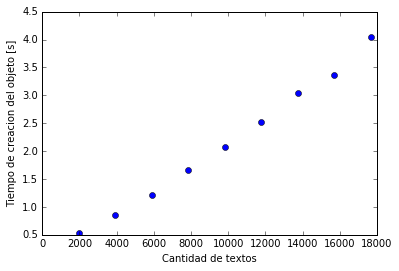

In [7]:
# Grafico de lo anterior

plt.plot(n_elements,durations,'o')
plt.xlabel("Cantidad de textos")
plt.ylabel("Tiempo de creacion del objeto [s]")


In [3]:
# Memoria de creacion del objeto
import cPickle
divs = 10
memory = []
n_elements = []
for i in range(1, divs):
    tc = TextClassifier(contenidos[:len(contenidos)/divs*i], [str(j) for j in range(len(contenidos))])
    L = len(cPickle.dumps(tc))
    memory.append(L)
    nel = len(contenidos)/divs*i
    print("Ocupo {:1.2f} en cargar con {:d} registros".format(float(L)/1024/1024, nel))
    n_elements.append(len(contenidos)/divs*i)

Ocupo 19.56 en cargar con 1962 registros
Ocupo 42.84 en cargar con 3924 registros
Ocupo 59.73 en cargar con 5886 registros
Ocupo 86.39 en cargar con 7848 registros
Ocupo 104.68 en cargar con 9810 registros
Ocupo 130.41 en cargar con 11772 registros
Ocupo 149.58 en cargar con 13734 registros
Ocupo 176.97 en cargar con 15696 registros
Ocupo 207.53 en cargar con 17658 registros


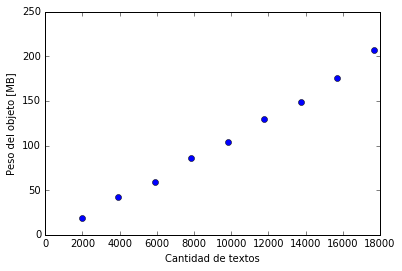

In [4]:
# Grafico de lo anterior

plt.plot(n_elements, np.array(memory)/1024/1024,'o')
plt.xlabel("Cantidad de textos")
plt.ylabel("Peso del objeto [MB]")


In [22]:
%%bash
free

              total        used        free      shared  buff/cache   available
Mem:        3959496     2515836      250568      797244     1193092      371632
Swap:       4106236     1522036     2584200


In [24]:
%%bash
free

              total        used        free      shared  buff/cache   available
Mem:        3959496     2418684      331356      812832     1209456      453152
Swap:       4106236     1521992     2584244


In [2]:
import codecs
import copy

TEST_DIR = "/home/mec/testData/textos/20_newsgroups/"
cats = os.listdir(TEST_DIR)
cats_totales = []
contenidos = []
for cat in cats:
    temp_list = os.listdir(os.path.join(TEST_DIR, cat))
    cats_totales = cats_totales + [cat for i in range(len(temp_list))]
    temp_list = map(lambda x: os.path.join(TEST_DIR, cat, x),
                    temp_list)
    for filename in temp_list:
        with codecs.open(
                filename, encoding='latin1', mode='r') as content_file:
            lines = content_file.readlines()
            content = ''.join(lines[11:])
        contenidos.append(content)
# sacar los textos muy cortos
largo = map(len, contenidos)
#contenidos = [c for c, l in zip(contenidos, largo) if l > 100]
#labels = [lab for lab, l in zip(cats_totales, largo) if l > 100]
labels = cats_totales
ids = [str(i) for i in range(len(contenidos))]
sorted_labels = [x for (y,x) in sorted(zip(ids,cats_totales))]
texts = copy.deepcopy(contenidos)
tc = TextClassifier(texts, ids)

Algo


In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            ids, labels, test_size=0.5, random_state=42)

In [4]:
tc.make_classifier("prueba", X_train, y_train)
indices = np.searchsorted(tc.ids, X_test)
my_score = tc.prueba.score(tc.tfidf_mat[indices,:], y_test)
my_score

0.8460846084608461

# DEBUGGING! 

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
tv = TfidfVectorizer(input='content', encoding='latin1', decode_error='strict', strip_accents='ascii', 
                     lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, 
                     ngram_range=(1, 1), max_df=1.0, min_df=3, max_features=None, 
                     vocabulary=None, binary=False, norm='l2', use_idf=True, 
                     smooth_idf=True, sublinear_tf=False)
ct = CountVectorizer(input='content', encoding='latin1', decode_error='strict', strip_accents='ascii', 
                     lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, 
                     ngram_range=(1, 1), max_df=1.0, min_df=3, max_features=None, 
                     vocabulary=None, binary=False)
tfidf_mat = tv.fit_transform(contenidos)
count_mat = ct.fit_transform(contenidos)

In [62]:
from sklearn.svm import LinearSVC
#tfidf_mat = tc.tfidf_mat
X_train, X_test, y_train, y_test = train_test_split(
                tc.tfidf_mat, sorted_labels, test_size=0.5, random_state=0)
svm = LinearSVC()


svm.fit(X_train, y_train)
print "Score correctas: {:f}".format(svm.score(X_test,y_test))

Score correctas: 0.598260


In [12]:
tc.ids

array(['0', '1', '10', ..., '9997', '9998', '9999'], 
      dtype='|S5')

In [5]:
mat2  = tc.vectorizer.fit_transform(contenidos)

In [6]:
mat2

<19997x168351 sparse matrix of type '<type 'numpy.int64'>'
	with 2825463 stored elements in Compressed Sparse Row format>

In [18]:
tc.term_mat

<19997x168351 sparse matrix of type '<type 'numpy.int64'>'
	with 2825463 stored elements in Compressed Sparse Row format>

In [27]:
indices = np.in1d(tc.ids, X_test)

In [28]:
indices


array([ True, False, False, ..., False,  True, False], dtype=bool)

In [32]:
np.searchsorted(tc.ids,ids)

array([    0,     1,  2000, ..., 19994, 19995, 19996])

In [35]:
mezcladas = np.random.choice(tc.ids,size=len(tc.ids))

In [36]:
np.searchsorted(mezcladas,ids)

array([    0,     0, 12181, ..., 19978, 19978, 19978])

In [37]:
np.searchsorted()

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

In [10]:
contenidos.sort(key=dict(zip(contenidos, ids)).get)

In [9]:
ids.sort()

In [11]:
ids

['0',
 '1',
 '10',
 '100',
 '1000',
 '10000',
 '10001',
 '10002',
 '10003',
 '10004',
 '10005',
 '10006',
 '10007',
 '10008',
 '10009',
 '1001',
 '10010',
 '10011',
 '10012',
 '10013',
 '10014',
 '10015',
 '10016',
 '10017',
 '10018',
 '10019',
 '1002',
 '10020',
 '10021',
 '10022',
 '10023',
 '10024',
 '10025',
 '10026',
 '10027',
 '10028',
 '10029',
 '1003',
 '10030',
 '10031',
 '10032',
 '10033',
 '10034',
 '10035',
 '10036',
 '10037',
 '10038',
 '10039',
 '1004',
 '10040',
 '10041',
 '10042',
 '10043',
 '10044',
 '10045',
 '10046',
 '10047',
 '10048',
 '10049',
 '1005',
 '10050',
 '10051',
 '10052',
 '10053',
 '10054',
 '10055',
 '10056',
 '10057',
 '10058',
 '10059',
 '1006',
 '10060',
 '10061',
 '10062',
 '10063',
 '10064',
 '10065',
 '10066',
 '10067',
 '10068',
 '10069',
 '1007',
 '10070',
 '10071',
 '10072',
 '10073',
 '10074',
 '10075',
 '10076',
 '10077',
 '10078',
 '10079',
 '1008',
 '10080',
 '10081',
 '10082',
 '10083',
 '10084',
 '10085',
 '10086',
 '10087',
 '10088',
 '